# Mask Detection Image Classifier

Covid-19 is the greatest challenge facing the world at the moment, and every tool should be used in order to fight it. This model to determine if people are wearing masks or not.

## Data

The data consists of 4,962 total images of a people either wearing or not wearing a mask. These images were divided into train and test directories, with each directory having a with_mask and without_mask subdirectory. The train subdirectories each contain 1,735 images for a total of 3,470 in the train folder, while the test subdirectories have 738 images in the with_mask subdirectory, and 754 images in the without_mask directory, giving us a total of 1,492 images in the test folder.

In [1]:
import sys
sys.path.insert(1, '../src/visualization/')
import visualize as vi

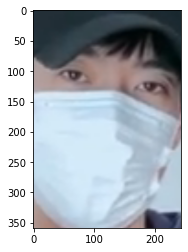

In [2]:
vi.show_image('../data/raw/train/with_mask/0_0_≈˙◊¢ 2020-02-23 132400.png')

The images were gray-scaled and resized so that every image was of the same size before they were analyzed by the model. In this case the images were resized to be 50 by 50. Each image was giving a label depending on what directory they originated from.

From here, the training data was augmented in order to create more data to train the model on. This consisted of flipping the image horizontally and shifting the images up, down, left, and right. By also applying these augmentations to already augmented images, the number of training images was increased by a factor of 32, giving us a total of 111,040 training images.

In [3]:
sys.path.insert(1, '../src/data/')
from make_dataset import (train_images, train_labels, test_images, test_labels,
                          IMG_SIZE, CATEGORIES)

In [4]:
train_images[0]

array([[[0.10980392],
        [0.11372549],
        [0.10588235],
        ...,
        [0.1372549 ],
        [0.13333333],
        [0.12156863]],

       [[0.10980392],
        [0.11372549],
        [0.11372549],
        ...,
        [0.1372549 ],
        [0.15294118],
        [0.10980392]],

       [[0.10588235],
        [0.11372549],
        [0.11764706],
        ...,
        [0.16470588],
        [0.15294118],
        [0.11372549]],

       ...,

       [[0.85882353],
        [0.82352941],
        [0.82352941],
        ...,
        [0.5254902 ],
        [0.5372549 ],
        [0.56078431]],

       [[0.84313725],
        [0.81176471],
        [0.76078431],
        ...,
        [0.52941176],
        [0.54901961],
        [0.56470588]],

       [[0.8       ],
        [0.75686275],
        [0.72941176],
        ...,
        [0.54901961],
        [0.55686275],
        [0.59607843]]])

In [5]:
train_labels

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

## Model

The model is a convolutional neural network. It was created using the Sequential module from the Keras API. ReLu activation functions were used for each layer, expect for the last layer which implements a sigmoid activation function. The L2 regularizer is used in every hidden layer with a set learning rate of 1e-5. Binary_crossentropy was set as the loss measurement, adam was the selected optimizer, and accuracy is the desired measurement.

In [6]:
sys.path.insert(1, '../src/models/')
from build_model import model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

In [7]:
BATCH_SIZE = 16
EPOCHS = 5
results = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=.2)

Epoch 1/5
5552/5552 [==============================] - 318s 57ms/step - loss: 0.1411 - accuracy: 0.9518 - val_loss: 0.0666 - val_accuracy: 0.9865
Epoch 2/5
5552/5552 [==============================] - 457s 82ms/step - loss: 0.0752 - accuracy: 0.9861 - val_loss: 0.0581 - val_accuracy: 0.9933
Epoch 3/5
5552/5552 [==============================] - 461s 83ms/step - loss: 0.0657 - accuracy: 0.9911 - val_loss: 0.0555 - val_accuracy: 0.9960
Epoch 4/5
5552/5552 [==============================] - 448s 81ms/step - loss: 0.0634 - accuracy: 0.9923 - val_loss: 0.0534 - val_accuracy: 0.9969
Epoch 5/5
5552/5552 [==============================] - 379s 68ms/step - loss: 0.0621 - accuracy: 0.9930 - val_loss: 0.0463 - val_accuracy: 0.9986


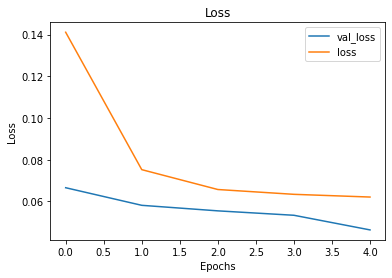

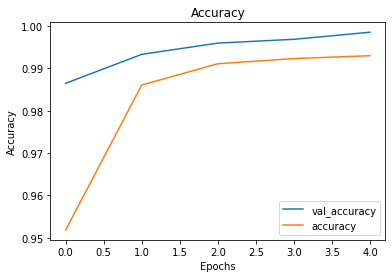

In [8]:
vi.visualize_training_results(results)

## Results

### Model Performance on Training Data

In [18]:
model.evaluate(train_images, train_labels)

3470/3470 [==============================] - 86s 25ms/step - loss: 0.0442 - accuracy: 0.9994


[0.04422454535961151, 0.9993876218795776]

In [11]:
# Make predictions
import numpy as np
train_preds = model.predict(train_images)
flat_list = [item for sublist in train_preds.tolist() for item in sublist]
rounded_train_preds = [int(np.round(ele)) for ele in flat_list]

In [12]:
from sklearn.metrics import classification_report
print(classification_report(train_labels, rounded_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55520
           1       1.00      1.00      1.00     55520

    accuracy                           1.00    111040
   macro avg       1.00      1.00      1.00    111040
weighted avg       1.00      1.00      1.00    111040



#### Confusion Matrix for Training Data

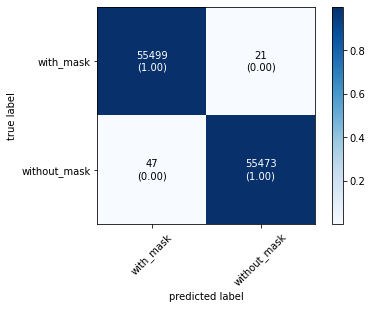

In [13]:
vi.plot_cm(train_labels, rounded_train_preds, CATEGORIES)

### Model Performance on Testing Data

In [19]:
model.evaluate(test_images, test_labels)

47/47 [==============================] - 1s 25ms/step - loss: 0.2010 - accuracy: 0.9645


[0.2010478675365448, 0.9644772410392761]

In [20]:
# Make predictions
test_preds = model.predict(test_images)
flat_list = [item for sublist in test_preds.tolist() for item in sublist]
rounded_test_preds = [int(np.round(ele)) for ele in flat_list]

In [15]:
print(classification_report(test_labels, rounded_test_preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       738
           1       0.95      0.98      0.97       754

    accuracy                           0.96      1492
   macro avg       0.97      0.96      0.96      1492
weighted avg       0.96      0.96      0.96      1492



#### Confusion Matrix for Testing data

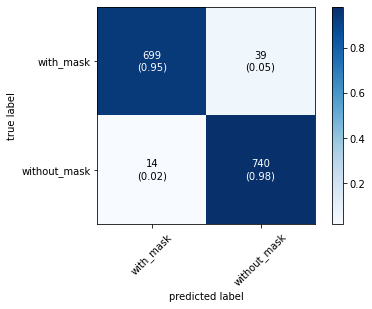

In [16]:
vi.plot_cm(test_labels, rounded_test_preds, CATEGORIES)

#### Save model

In [17]:
model.save(f'../models/{IMG_SIZE}x{IMG_SIZE}-{EPOCHS}-epochs-{len(train_images)}-images.h5')